# Оценка стоимости недвижимости с помощью нейронной сети


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#!ls "/content/drive/My Drive/"

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.214
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.42
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [ ]:
rm -Rf /content/test_directory*

In [ ]:
!ls /content

drive  sample_data


Загрузка данных с Google Drive

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/train.csv")

Отображение загруженных данных

In [ ]:
data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06

In [ ]:
data = data.drop(columns=['id'])

In [ ]:
data = data.dropna(axis = 'columns')

In [ ]:
data

,timestamp,full_sq,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,...,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2011-08-23,34,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,no,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,...,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,2011-08-27,43,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,no,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,...,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,2011-09-01,89,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,...,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,2011-09-05,77,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,...,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,no,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,12703,...,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,2015-06-30,86,Investment,Tverskoe,7.307411e+06,75377,0.065444,0.000078,4237,4,6

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 240 entries, timestamp to price_doc
dtypes: float64(68), int64(156), object(16)
memory usage: 55.8+ MB


In [ ]:
data.dtypes

timestamp              object
full_sq                 int64
product_type           object
sub_area               object
area_m                float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 240, dtype: object

In [ ]:
data_object = data.select_dtypes(include=[object])
data_object

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,no,no,no,no,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,no,yes,yes,no,no,no,no,no,yes,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,Investment,Otradnoe,no,no,yes,no,yes,no,no,no,no,no,no,no,good
30467,2015-06-30,Investment,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,poor
30468,2015-06-30,OwnerOccupier,Poselenie Vnukovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
30469,2015-06-30,Investment,Obruchevskoe,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory


In [ ]:
data_int = data.select_dtypes(include=[np.number])
data_int

,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,...,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,...,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,...,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,19401,9045,...,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,3292,1450,...,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,5164,2583,...,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,12703,29282,9753,5044,4709,10311,5335,4976,23849,12412,11437,11588,5359,...,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,86,7.307411e+06,75377,0.065444,0.000078,4237,4,6398,4,1,3,2,29,16,10,23,141,116742,52836,63906,11272,5470,5802,43921,21901,22020,20184,6644,13540,4237,2079,2158,

In [ ]:
data_int = data_int.dropna(axis = 'columns')
data_int

,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,...,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,43,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,25631,9576,4899,4677,10309,5463,4846,23603,12286,11317,17508,9425,...,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,34,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,20165,6880,3466,3414,7759,3909,3850,17700,8998,8702,15164,7571,...,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,43,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,17683,5879,3095,2784,6207,3269,2938,14884,7821,7063,19401,9045,...,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,89,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,20446,13087,6645,6442,13670,7126,6544,32063,16513,15550,3292,1450,...,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,77,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,18197,5706,2982,2724,6748,3664,3084,15237,8113,7124,5164,2583,...,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,44,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,12703,29282,9753,5044,4709,10311,5335,4976,23849,12412,11437,11588,5359,...,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,86,7.307411e+06,75377,0.065444,0.000078,4237,4,6398,4,1,3,2,29,16,10,23,141,116742,52836,63906,11272,5470,5802,43921,21901,22020,20184,6644,13540,4237,2079,2158,

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_encoder = data_object.apply(le.fit_transform)
data_encoder

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,70,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,129,0,0,0,0,1,0,0,0,0,0,0,0,3
3,3,0,65,0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,0,6,0,0,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1160,0,82,0,0,1,0,1,0,0,0,0,0,0,0,1
30467,1160,0,134,1,0,0,0,1,1,0,0,1,0,0,0,3
30468,1160,1,103,0,0,0,0,0,0,0,0,0,0,0,0,2
30469,1160,0,77,0,0,0,0,1,0,0,0,0,0,0,0,4


In [ ]:
data_2 = pd.concat([data_encoder, data_int], axis=1)
data_2

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,...,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1,43,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,...,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,1,0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,34,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,...,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,2,0,129,0,0,0,0,1,0,0,0,0,0,0,0,3,43,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,...,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,3,0,65,0,0,0,0,0,0,0,0,0,0,0,0,1,89,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,...,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,4,0,6,0,0,0,0,1,1,0,0,0,0,0,1,0,77,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,...,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1160,0,82,0,0,1,0,1,0,0,0,0,0,0,0,1,44,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,...,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,1160,0,134,1,0,0,0,1,1,0,0,1,0,0,0,3,86,7.307411e+06,75377,0.065444,0.000078,4237,4,6398,4,1,3,2,29,16,10,23,141,116742,52836,63906,11272,5470,5802,43921,...,6.52,11.35,299,4208928,28,845372,1039,54,268,258,230,155,57,17,35,62,1,48,80,4,8.29,617,9949843,90,4345915,2197,136,550,535,511,313,128,24,98,182,1,82,171,15,25000000
30468,1160,1,103,0,0,0,0,0,0,0,0,0,0,0,0,2,45,2.553630

In [ ]:
data_2 = data_2.dropna(axis = 'columns')
data_2

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,...,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1,43,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,...,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,1,0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,34,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,...,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,2,0,129,0,0,0,0,1,0,0,0,0,0,0,0,3,43,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,...,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,3,0,65,0,0,0,0,0,0,0,0,0,0,0,0,1,89,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,...,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,4,0,6,0,0,0,0,1,1,0,0,0,0,0,1,0,77,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,...,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1160,0,82,0,0,1,0,1,0,0,0,0,0,0,0,1,44,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,...,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,1160,0,134,1,0,0,0,1,1,0,0,1,0,0,0,3,86,7.307411e+06,75377,0.065444,0.000078,4237,4,6398,4,1,3,2,29,16,10,23,141,116742,52836,63906,11272,5470,5802,43921,...,6.52,11.35,299,4208928,28,845372,1039,54,268,258,230,155,57,17,35,62,1,48,80,4,8.29,617,9949843,90,4345915,2197,136,550,535,511,313,128,24,98,182,1,82,171,15,25000000
30468,1160,1,103,0,0,0,0,0,0,0,0,0,0,0,0,2,45,2.553630

Удаление столбца medv из набора данных

In [ ]:
features = data_2.drop(columns=['price_doc'])

In [ ]:
features

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,...,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1,43,6.407578e+06,155572,0.189727,0.000070,9576,5,10309,5,0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,...,1,11.98,13.55,12,251554,23,1419204,68,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,29,807385,52,4036616,152,12,39,48,40,9,4,0,13,22,1,0,52,4
1,1,0,70,1,0,0,0,0,0,0,0,0,0,0,0,0,34,9.589337e+06,115352,0.372602,0.049637,6880,5,7759,8,0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,...,0,18.07,27.32,12,821986,14,491565,30,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,66,2690465,40,2034942,177,9,49,65,36,15,3,0,15,29,1,10,66,14
2,2,0,129,0,0,0,0,1,0,0,0,0,0,0,0,3,43,4.808270e+06,101708,0.112560,0.118537,5879,4,6207,7,0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,...,5,12.14,26.46,8,110856,7,52550,41,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,43,1478160,35,1572990,122,10,29,45,25,10,3,0,11,27,0,4,67,10
3,3,0,65,0,0,0,0,0,0,0,0,0,0,0,0,1,89,1.258354e+07,178473,0.194703,0.069753,13087,9,13670,10,0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,...,2,20.79,3.57,4,167000,12,205756,32,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,8,244166,22,942180,61,4,7,21,15,11,2,1,4,4,0,0,26,3
4,4,0,6,0,0,0,0,1,1,0,0,0,0,0,1,0,77,8.398461e+06,108171,0.015234,0.037316,5706,7,6748,9,0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,...,3,5.06,8.62,305,3420907,60,2296870,1068,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,689,8404624,114,3503058,2283,143,566,578,552,319,108,17,135,236,2,91,195,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,1160,0,82,0,0,1,0,1,0,0,0,0,0,0,0,1,44,1.005305e+07,175518,0.096270,0.300323,9753,4,10311,4,0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,...,3,13.14,21.25,17,410183,22,745130,79,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,44,838601,53,2548292,207,18,63,59,47,15,5,0,15,26,1,2,84,6
30467,1160,0,134,1,0,0,0,1,1,0,0,1,0,0,0,3,86,7.307411e+06,75377,0.065444,0.000078,4237,4,6398,4,1,3,2,29,16,10,23,141,116742,52836,63906,11272,5470,5802,43921,...,2,6.52,11.35,299,4208928,28,845372,1039,54,268,258,230,155,57,17,35,62,1,48,80,4,8.29,617,9949843,90,4345915,2197,136,550,535,511,313,128,24,98,182,1,82,171,15
30468,1160,1,103,0,0,0,0,0,0,0,0,0,0,0,0,2,45,2.553630e+07,4001,0.496315,0.007122,275,0,264

Нормировка данных так, чтобы среднее = 0, стандартное отклонение = 1

In [ ]:
# Среднее значение
mymean = features.mean(axis=0)
# Стандартное отклонение
mystd = features.std(axis=0)
features -= mymean
features /= mystd

In [ ]:
features

,timestamp,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology,full_sq,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_education_centers_raion,children_school,school_education_centers_raion,school_education_centers_top_20_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,...,market_count_2000,green_part_3000,prom_part_3000,office_count_3000,office_sqm_3000,trc_count_3000,trc_sqm_3000,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,-2.466945,-0.752845,-1.719242,-0.259894,-0.239572,-0.286803,-0.099041,-0.744731,-0.196784,-0.319471,-0.170724,-0.333139,-0.288208,-0.162186,-0.173754,-0.825777,-0.294868,-0.544779,1.235770,-0.166744,-1.000959,1.162277,0.312276,1.241899,0.085620,-0.329039,-0.214947,-0.311619,0.055534,0.031491,-0.189827,2.488294,-0.308173,-0.212349,-0.206504,-0.217207,1.203576,1.235697,1.167002,1.188230,...,-0.118756,-0.766848,0.324068,-0.213506,-0.276205,1.023650,2.088581,-0.147744,-0.124689,-0.094423,-0.121537,-0.150800,-0.249990,-0.215968,-0.254776,-0.267468,-0.321423,-0.444546,-0.293920,0.040368,-0.581079,-0.863593,-0.272666,-0.257776,0.914065,2.849041,-0.220641,-0.174544,-0.215950,-0.201656,-0.189155,-0.313865,-0.238989,-0.326969,-0.070249,-0.174274,0.915161,-0.420238,-0.017208,-0.406419
1,-2.463406,-0.752845,-0.165287,3.847593,-0.239572,-0.286803,-0.099041,-0.744731,-0.196784,-0.319471,-0.170724,-0.333139,-0.288208,-0.162186,-0.173754,-1.642495,-0.531514,-0.390696,0.540779,0.877718,-0.583331,0.455893,0.312276,0.602744,0.956420,-0.329039,-0.214947,-0.311619,-0.096627,-0.576401,0.472210,-0.253274,-0.350659,-0.247406,-0.254996,-0.240932,0.548771,0.514835,0.583748,0.440889,...,-0.815716,-0.332385,2.058708,-0.213506,0.263912,0.199054,0.113753,-0.278718,-0.343958,-0.233647,-0.279745,-0.320159,-0.274214,-0.215968,-0.254776,-0.332346,-0.205078,-0.444546,0.161013,-0.065767,-0.581079,-1.116081,-0.034480,0.559869,0.412478,0.856949,-0.172054,-0.264717,-0.136543,-0.066914,-0.221393,-0.232195,-0.274218,-0.326969,-0.001564,-0.026432,0.915161,0.065653,0.285216,1.638898
2,-2.459866,-0.752845,1.337718,-0.259894,-0.239572,-0.286803,-0.099041,1.342722,-0.196784,-0.319471,-0.170724,-0.333139,-0.288208,-0.162186,-0.173754,0.807658,-0.294868,-0.622229,0.305014,-0.607473,-0.002813,0.193620,-0.021749,0.213736,0.666154,-0.329039,-0.214947,-0.311619,-0.248788,-0.576401,-0.189827,-0.885944,-0.308173,-0.156609,-0.163250,-0.150964,0.223118,0.259891,0.183554,0.259316,...,2.669084,-0.755434,1.950372,-0.262675,-0.409425,-0.442299,-0.820855,-0.240805,-0.289141,-0.261492,-0.193450,-0.249593,-0.249990,-0.215968,-0.254776,-0.397223,-0.049950,-0.444546,-0.293920,-0.012700,1.620072,-0.810062,-0.182541,0.033478,0.203483,0.397208,-0.278946,-0.234659,-0.295356,-0.225434,-0.310048,-0.300254,-0.274218,-0.326969,-0.138933,-0.068673,-0.726150,-0.225882,0.306818,0.820771
3,-2.456327,-0.752845,-0.292661,-0.259894,-0.239572,-0.286803,-0.099041,-0.744731,-0.196784,-0.319471,-0.170724,-0.333139,-0.

In [ ]:
y = data_2.iloc[:, 239]

In [ ]:
y

0         5850000
1         6000000
2         5700000
3        13100000
4        16331452
           ...   
30466     7400000
30467    25000000
30468     6970959
30469    13500000
30470     5600000
Name: price_doc, Length: 30471, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=2, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 00m 17s]
val_mae: 5895119.0

Best val_mae So Far: 5895119.0
Total elapsed time: 00h 00m 27s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 928
Score: 5895119.0
Trial summary
Hyperparameters:
units_input: 160
Score: 6845553.5


In [ ]:
models = tuner.get_best_models(num_models=3)

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 928)               222720    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 929       
Total params: 223,649
Trainable params: 223,649
Non-trainable params: 0
_________________________________________________________________
315/315 [==============================] - 1s 2ms/step - loss: 55962119438336.0000 - mae: 5897218.5000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               38400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 38,561
Trainable params: 38,561
Non-trainabl

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 00m 41s]
val_mae: 2383650.0

Best val_mae So Far: 2347696.75
Total elapsed time: 00h 01m 23s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 864
units_hidden: 480
Score: 2347696.75
Trial summary
Hyperparameters:
units_input: 832
units_hidden: 288
Score: 2383650.0


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 864)               207360    
_________________________________________________________________
dense_1 (Dense)              (None, 480)               415200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 481       
Total params: 623,041
Trainable params: 623,041
Non-trainable params: 0
_________________________________________________________________
315/315 [==============================] - 1s 2ms/step - loss: 15752778219520.0000 - mae: 2395518.2500

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 832)               199680    
__________________________________________________________

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  #model.compile(optimizer="adam", loss='mse', metrics=['mae'])

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        2.7G        7.2G        1.1M        2.8G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 00m 41s]
val_mae: nan

Best val_mae So Far: nan
Total elapsed time: 00h 01m 21s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 704
units_hidden: 256
optimizer: SGD
Score: nan
Trial summary
Hyperparameters:
activation: sigmoid
units_input: 800
units_hidden: 288
optimizer: adam
Score: 7070523.5


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

NotFoundError: ignored

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])

  #model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 2, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                7680      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 2 Complete [00h 00m 32s]
val_mae: 1675719.875

Best val_mae So Far: 1675719.875
Total elapsed time: 00h 01m 05s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: selu
units_input: 480
hidden_layers: 3
layer_0_units_: 352
layer_1_units_: 16
layer_2_units_: 157
Score: 1675719.875
Trial summary
Hyperparameters:
activation: relu
units_input: 512
hidden_layers: 3
layer_0_units_: 288
layer_1_units_: 16
layer_2_units_: 10
Score: 2205706.75


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               115200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               169312    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5648      
_________________________________________________________________
dense_3 (Dense)              (None, 157)               2669      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 292,987
Trainable params: 292,987
Non-trainable params: 0
__________________________________________________

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               115200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               169312    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5648      
_________________________________________________________________
dense_3 (Dense)              (None, 157)               2669      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 292,987
Trainable params: 292,987
Non-trainable params: 0
__________________________________________________

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 480)               115200    
_________________________________________________________________
dropout (Dropout)            (None, 480)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 352)               169312    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                5648      
_________________________________________________________________
dense_3 (Dense)              (None, 157)               2669      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 158       
Total params: 292,987
Trainable params: 292,987
Non-trainable params: 0
__________________________________________________

In [ ]:
best_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
511/511 [==============================] - 4s 7ms/step - loss: 41706770661376.0000 - mae: 4435634.0000 - val_loss: 20098599354368.0000 - val_mae: 2953764.0000
Epoch 2/10
511/511 [==============================] - 3s 6ms/step - loss: 22322746490880.0000 - mae: 2888460.0000 - val_loss: 16924545122304.0000 - val_mae: 2611802.5000
Epoch 3/10
511/511 [==============================] - 3s 6ms/step - loss: 20287078793216.0000 - mae: 2693898.7500 - val_loss: 15879711490048.0000 - val_mae: 2570036.0000
Epoch 4/10
511/511 [==============================] - 3s 6ms/step - loss: 19236378378240.0000 - mae: 2598035.0000 - val_loss: 15013086494720.0000 - val_mae: 2464055.7500
Epoch 5/10
511/511 [==============================] - 3s 6ms/step - loss: 18447484321792.0000 - mae: 2528707.5000 - val_loss: 14432778321920.0000 - val_mae: 2398961.5000
Epoch 6/10
511/511 [==============================] - 3s 6ms/step - loss: 17794915631104.0000 - mae: 2472901.0000 - val_loss: 13744210968576.0000 - va

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.604969685987127


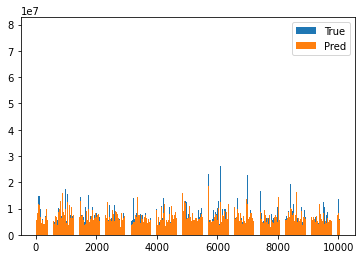

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()